In [1]:
# Import standard modules.
from importlib import import_module
import os
import sys

# Import supplemental modules.
import matplotlib.pyplot as plt
import numpy as np

# Import project modules.
import pinn.standard_plots as psp

In [2]:
# Specify the run ID (aka problem name).
runid = "square_wave_n"

# Add the subdirectory for the run results to the module search path.
run_path = os.path.join(".", runid)
sys.path.append(run_path)

# Import the problem definition from the run results directory.
p = import_module(runid)

# Read the run hyperparameters from the run results directory.
import hyperparameters as hp

2023-05-08 12:07:22.775654: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load all data.

# Load the training point coordinates.
X_train = np.loadtxt(os.path.join(runid, "X_train.dat"))
t_train = X_train[:, p.it]
x_train = X_train[:, p.ix]

# Load the data locations and values (includes initial conditions).
XY_data = np.loadtxt(os.path.join(runid, "XY_data.dat"))

# Extract the initial conditions (everything after the coordinate values on each row).
ic = XY_data[:, p.n_dim:]

# Load the model-predicted values.
ψ = []
delψ = []
for var_name in p.dependent_variable_names:
    ψ.append(np.loadtxt(os.path.join(runid, "%s_train.dat" % var_name)))
    delψ.append(np.loadtxt(os.path.join(runid, "del_%s_train.dat" % var_name)))

# Load the loss function histories.
losses_model = np.loadtxt(os.path.join(runid, "losses_model.dat"))
losses_model_res = np.loadtxt(os.path.join(runid, "losses_model_res.dat"))
losses_model_data = np.loadtxt(os.path.join(runid, "losses_model_data.dat"))
losses = np.loadtxt(os.path.join(runid, "losses.dat"))
losses_res = np.loadtxt(os.path.join(runid, "losses_res.dat"))
losses_data = np.loadtxt(os.path.join(runid, "losses_data.dat"))

# <HACK>
# Reshape 1-D arrays to 2-D since only 1 dependent variable.
n_losses = losses.shape[0]
losses_model.shape = (n_losses, 1)
losses_model_res.shape = (n_losses, 1)
losses_model_data.shape = (n_losses, 1)
losses.shape = (n_losses, 1)
losses_res.shape = (n_losses, 1)
losses_data.shape = (n_losses, 1)
# </HACK>

In [4]:
# Compute the limits of the training domain.
t_min = t_train[0]
t_max = t_train[-1]
x_min = x_train[0]
x_max = x_train[-1]

# Extract the unique training point values (a grid is assumed).
t_train_vals = np.unique(t_train)
x_train_vals = np.unique(x_train)
n_t_train_vals = len(t_train_vals)
n_x_train_vals = len(x_train_vals)

In [5]:
# Plotting options

# Specify the size (width, height) (in inches) for individual subplots.
SUBPLOT_WIDTH = 5.0
SUBPLOT_HEIGHT = 5.0

# Compute the coordinate plot tick locations and labels.
# XY_N_X_TICKS = 5
# XY_x_tick_pos = np.linspace(x_min, x_max, XY_N_X_TICKS)
# XY_x_tick_labels = ["%.1f" % x for x in XY_x_tick_pos]
# XY_N_Y_TICKS = 5
# XY_y_tick_pos = np.linspace(y_min, y_max, XY_N_Y_TICKS)
# XY_y_tick_labels = ["%.1f" % y for y in XY_y_tick_pos]

# Compute the heat map tick locations and labels.
# HEATMAP_N_X_TICKS = 5
# heatmap_x_tick_pos = np.linspace(0, n_x_train_vals - 1, HEATMAP_N_X_TICKS)
# heatmap_x_tick_labels = ["%.1f" % (x_min + x/(n_x_train_vals - 1)*(x_max - x_min)) for x in heatmap_x_tick_pos]
# HEATMAP_N_Y_TICKS = 5
# heatmap_y_tick_pos = np.linspace(0, n_y_train_vals - 1, HEATMAP_N_Y_TICKS)
# heatmap_y_tick_labels = ["%.1f" % (y_min + y/(n_y_train_vals - 1)*(y_max - y_min)) for y in heatmap_y_tick_pos]
# heatmap_y_tick_labels = list(reversed(heatmap_y_tick_labels))

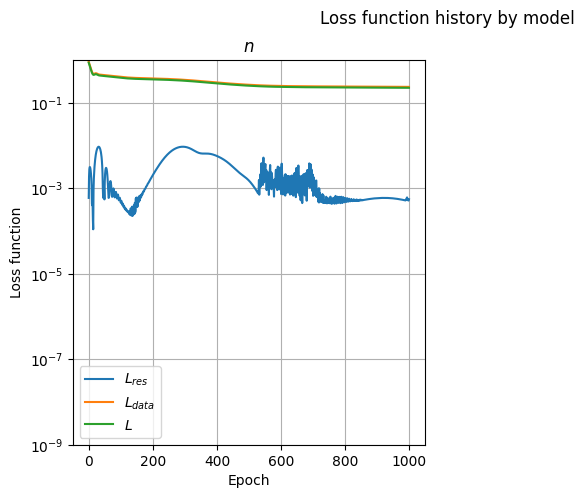

In [6]:
# Plot the loss history for each model.
fig = psp.plot_model_loss_functions(
    losses_model_res, losses_model_data, losses_model,
    p.dependent_variable_labels
)

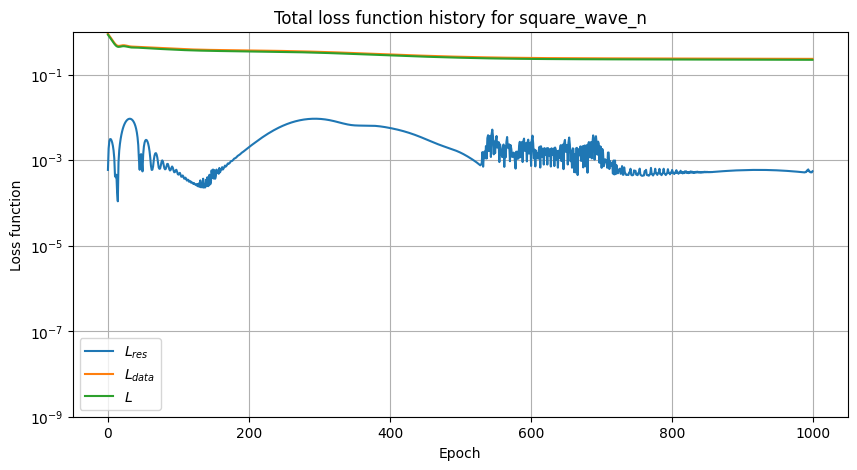

In [7]:
# Plot the total loss function history.
total_loss_figsize = (SUBPLOT_WIDTH*2, SUBPLOT_HEIGHT)
plt.figure(figsize=total_loss_figsize)
psp.plot_loss_functions(
    [losses_res, losses_data, losses],
    ["$L_{res}$", "$L_{data}$", "$L$"],
    title="Total loss function history for %s" % runid
)

In [8]:
# Extract the coordinates of the training points at the initial time.
n_start = n_x_train_vals
t0 = XY_data[:, p.it]
x0 = XY_data[:, p.ix]

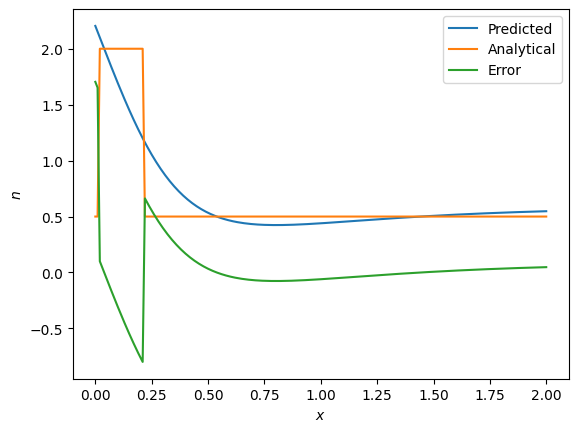

In [21]:
# Plot the actual, predicted, and absolute error in initial number density.
n0_act = p.n_analytical(t0, x0)
n0_pred = ψ[p.i_n][:n_start]
n0_err = n0_pred - n0_act

plt.plot(x0, n0_pred, label="Predicted")
plt.plot(x0, n0_act, label="Analytical")
plt.plot(x0, n0_err, label="Error")
plt.xlabel(p.independent_variable_labels[1])
plt.ylabel(p.dependent_variable_labels[0])
plt.legend()